### Implementing a back-tester for Random walk strategy

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [2]:
from mod_my_utils.read_write_data import *

In [3]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [4]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [5]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Read stock data

In [3]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [4]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
print(start_date)
print(end_date)
print(symbol)

1/1/2010
1/1/2015
HDFC


In [5]:
stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

stock name HDFC


In [6]:
data = stock_data[["Adj Close"]].copy() 
data.columns = ['price']
data.head()

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772644
2010-01-06,445.905975
2010-01-07,437.604309
2010-01-08,429.980499


In [7]:
from mod_backtest_utils.backtest_random import RandomForecastingStrategy
from mod_backtest_utils.portfolio import MarketOnPricePortfolio

AAPL


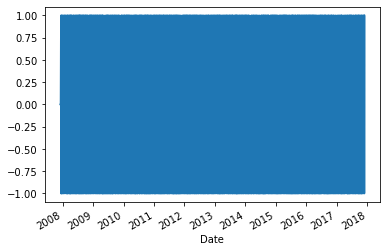

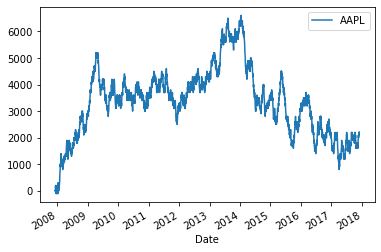

In [9]:
if __name__ == "__main__":
    symbol = 'AAPL'
    print(symbol)
    random_strategy = RandomForecastingStrategy(symbol, data)
    signals = random_strategy.generate_signals()
    signals.buy_sell.plot()
    portfolio = MarketOnPricePortfolio(symbol, signals)
    backtest_portfolio = portfolio.backtest_portfolio()
    portfolio.positions.plot()
#     backtest_portfolio.holdings.plot()
    

<AxesSubplot:xlabel='Date'>

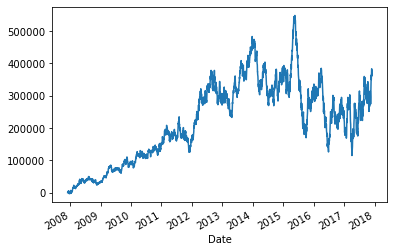

In [10]:
backtest_portfolio.holdings.plot()

<AxesSubplot:xlabel='Date'>

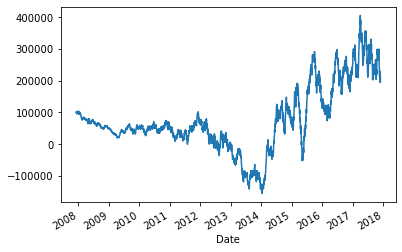

In [11]:
backtest_portfolio.cash.plot()

<AxesSubplot:xlabel='Date'>

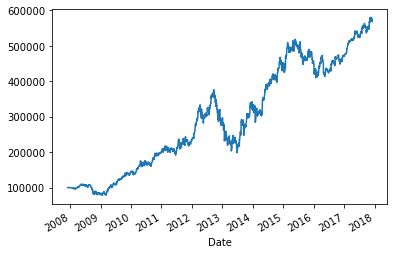

In [12]:
backtest_portfolio.total.plot()

In [13]:
backtest_portfolio['returns'] = backtest_portfolio.total.pct_change()

In [14]:
backtest_portfolio.head()

,holdings,cash,total,returns
Date,,,,
2007-12-03,0.0,100000.0,100000.0,NaN
2007-12-04,0.0,100000.0,100000.0,0.0
2007-12-05,0.0,100000.0,100000.0,0.0
2007-12-06,0.0,100000.0,100000.0,0.0
2007-12-07,0.0,100000.0,100000.0,0.0
